In [162]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

sns.set()
sns.set_style("darkgrid")
%matplotlib inline


# Carga de datos en dataframe

In [197]:
iris = datasets.load_iris()
#df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # type: ignore
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
X = df.iloc[:, 0:-1].values
y = df.iloc[:, [-1]].values  # type: ignore
df.target.replace({0.0:"Setosa", 1.0:"Versicolor", 2.0:"Virginica"}, inplace=True)

# Visualización de datos

In [193]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Revisión de valores nulos

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Gráficos

## Gráfico de pares

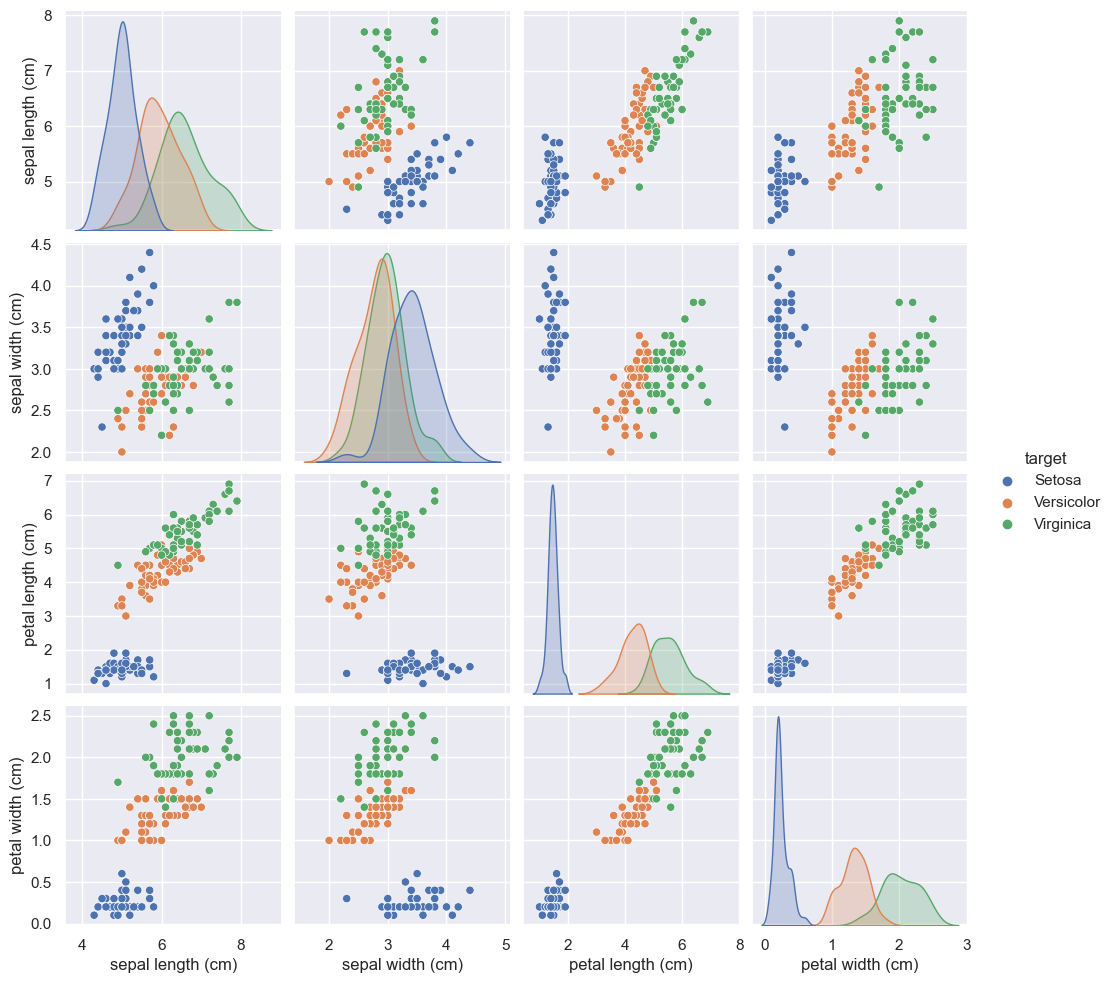

In [158]:
sns.pairplot(data=df, hue="target")


## Gráfico de cajas

<AxesSubplot: xlabel='target', ylabel='petal length (cm)'>

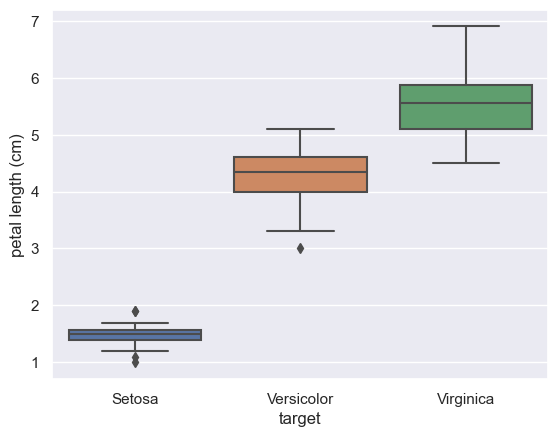

In [198]:
sns.boxplot(x='target', y = "petal length (cm)", data=df)

## Gráfico de calor

C:\Users\bfg_h\AppData\Local\Temp\ipykernel_3476\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

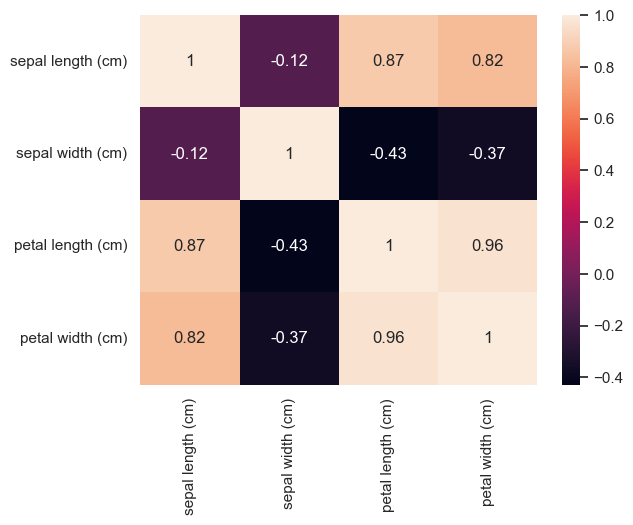

In [169]:
sns.heatmap(df.corr(),annot=True)

# Entrenamiento

In [200]:
labels = df.target
df.target = pd.Categorical(df.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: >

d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\ml\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


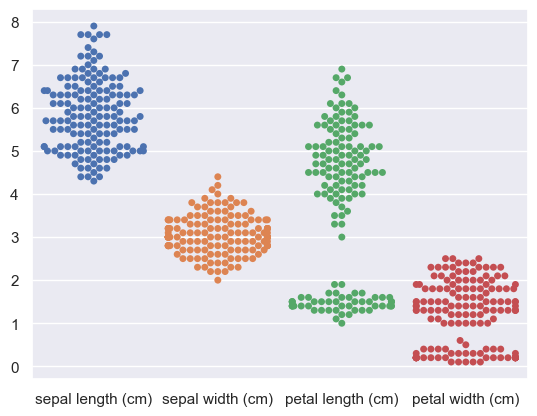

In [38]:
# Perceptron


[[-0.9044713   0.76044039 -1.27744957 -1.30176637]
 [ 1.19771786  0.30805376  1.25117811  1.487733  ]
 [ 0.08479418 -0.14433288  0.27420833  0.42506657]
 [ 0.33211056 -0.14433288  0.50408357  0.29223327]
 [ 1.32137604  0.30805376  1.13624049  1.487733  ]
 [ 0.70308511  0.08186044  1.02130287  0.82356648]
 [ 0.33211056 -0.14433288  0.67649     0.82356648]
 [-1.15178768 -1.50149278 -0.24301097 -0.23909995]
 [-1.02812949  1.21282702 -1.33491838 -1.30176637]
 [-0.78081312  2.34379361 -1.27744957 -1.43459967]
 [ 0.20845237 -1.95387941  0.73395881  0.42506657]
 [-1.52276223  0.08186044 -1.27744957 -1.30176637]
 [-0.40983856  0.98663371 -1.39238719 -1.30176637]
 [-1.27544586 -0.14433288 -1.33491838 -1.16893307]
 [ 0.57942693  0.76044039  1.07877168  1.6205663 ]
 [-1.15178768 -1.27529946  0.44661476  0.69073318]
 [ 1.32137604  0.08186044  0.79142763  1.487733  ]
 [-0.53349675  0.76044039 -1.27744957 -1.03609976]
 [ 0.57942693 -1.27529946  0.67649     0.42506657]
 [-0.16252219  1.66521366 -1.16